Question 1:

- \\( \eta = 0 \\) le poids ne change pas. 
\\( \eta = 1 \\) le poids de devient égal à X l'entrée.

- Plus \\( \sigma \\) est grand plus il y aura de neurones qui vont apprendre de l'entrée. 
Quand \\( \sigma \\) est grand la grille est plus serrée.

- \\( W = \frac{x_1 n_1 + x_2 n_2}{n_1 + n_2} \\)


In [12]:
# coding: utf8
#!/usr/bin/env python
# ------------------------------------------------------------------------
# Carte de Kohonen
# Écrit par Mathieu Lefort
#
# Distribué sous licence BSD.
# ------------------------------------------------------------------------
# Implémentation de l'algorithme des cartes auto-organisatrices de Kohonen
# ------------------------------------------------------------------------
# Pour que les divisions soient toutes réelles (pas de division entière)
from __future__ import division
# Librairie de calcul matriciel
import numpy
# Librairie d'affichage
import matplotlib.pyplot as plt
# Pour lire les données MNIST
import gzip, pickle



class Neuron:
  ''' Classe représentant un neurone '''
  
  def __init__(self, w, posx, posy):
    '''
    @summary: Création d'un neurone
    @param w: poids du neurone
    @type w: numpy array
    @param posx: position en x du neurone dans la carte
    @type posx: int
    @param posy: position en y du neurone dans la carte
    @type posy: int
    '''
    # Initialisation des poids
    self.weights = w
    # Initialisation de la position
    self.posx = posx
    self.posy = posy
    # Initialisation de la sortie du neurone
    self.y = 0.
  
  def compute(self,x):
    '''
    @summary: Affecte à y la valeur de sortie du neurone (i.e. la distance entre son poids et l'entrée)
    @param x: entrée du neurone
    @type x: numpy array
    '''
    # TODO Attention il faut bien renvoyer la distance entre le poids et l'entrée et pas 0/1 suivant si le neurone est gagnant ou pas comme dans le TP (la détermination du neurone gagnant se fait ailleurs dans le code)
    self.y = None

  def learn(self,eta,sigma,posxbmu,posybmu,x):
    '''
    @summary: Modifie les poids selon la règle de Kohonen
    @param eta: taux d'apprentissage
    @type eta: float
    @param sigma: largeur du voisinage
    @type sigma: float
    @param posxbmu: position en x du neurone gagnant (i.e. celui dont le poids est le plus proche de l'entrée)
    @type posxbmu: int
    @param posybmu: position en y du neurone gagnant (i.e. celui dont le poids est le plus proche de l'entrée)
    @type posybmu: int
    @param x: entrée du neurone
    @type x: numpy array
    '''
    # TODO
    self.weights[:] = numpy.random.random(self.weights.shape)


class SOM:
  ''' Classe implémentant une carte de Kohonen. '''

  def __init__(self, inputsize, gridsize):
    '''
    @summary: Création du réseau
    @param inputsize: taille de l'entrée
    @type inputsize: tuple
    @param gridsize: taille de la carte
    @type gridsize: tuple
    '''
    # Initialisation de la taille de l'entrée
    self.inputsize = inputsize
    # Initialisation de la taille de la carte
    self.gridsize = gridsize
    # Création de la carte
    # Carte de neurones
    self.map = []    
    # Carte des poids
    self.weightsmap = []
    # Carte des activités
    self.activitymap = []
    for posx in range(gridsize[0]):
      mline = []
      wmline = []
      amline = []
      for posy in range(gridsize[1]):
        neuron = Neuron(numpy.random.random(self.inputsize),posx,posy)
        mline.append(neuron)
        wmline.append(neuron.weights)
        amline.append(neuron.y)
      self.map.append(mline)
      self.weightsmap.append(wmline)
      self.activitymap.append(amline)
    self.activitymap = numpy.array(self.activitymap)

  def compute(self,x):
    '''
    @summary: calcule de l'activité des neurones de la carte
    @param x: entrée de la carte (identique pour chaque neurone)
    @type x: numpy array
    '''
    # On demande à chaque neurone de calculer son activité et on met à jour la carte d'activité de la carte
    for posx in range(self.gridsize[0]):
      for posy in range(self.gridsize[1]):
        self.map[posx][posy].compute(x)
        self.activitymap[posx][posy] = self.map[posx][posy].y

  def learn(self,eta,sigma,x):
    '''
    @summary: Modifie les poids de la carte selon la règle de Kohonen
    @param eta: taux d'apprentissage
    @type eta: float
    @param sigma: largeur du voisinage
    @type sigma: float
    @param x: entrée de la carte
    @type x: numpy array
    '''
    # Calcul du neurone vainqueur
    bmux,bmuy = numpy.unravel_index(numpy.argmin(self.activitymap),self.gridsize)
    # Mise à jour des poids de chaque neurone
    for posx in range(self.gridsize[0]):
      for posy in range(self.gridsize[1]):
        self.map[posx][posy].learn(eta,sigma,bmux,bmuy,x)

        
      

  def scatter_plot(self,interactive=False):
    '''
    @summary: Affichage du réseau dans l'espace d'entrée (utilisable dans le cas d'entrée à deux dimensions et d'une carte avec une topologie de grille)
    @param interactive: Indique si l'affichage se fait en mode interactif
    @type interactive: boolean
    '''
    # Création de la figure
    if not interactive:
      plt.figure()
    # Récupération des poids
    w = numpy.array(self.weightsmap)
    # Affichage des poids
    plt.scatter(w[:,:,0].flatten(),w[:,:,1].flatten(),c='k')
    # Affichage de la grille
    for i in range(w.shape[0]):
      plt.plot(w[i,:,0],w[i,:,1],'k',linewidth=1.)
    for i in range(w.shape[1]):
      plt.plot(w[:,i,0],w[:,i,1],'k',linewidth=1.)
    # Modification des limites de l'affichage
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    # Affichage du titre de la figure
    plt.suptitle('Poids dans l\'espace d\'entree')
    # Affichage de la figure
    if not interactive:
      plt.show()

  def plot(self):
    '''
    @summary: Affichage des poids du réseau (matrice des poids)
    '''
    # Récupération des poids
    w = numpy.array(self.weightsmap)
    # Création de la figure
    f,a = plt.subplots(w.shape[0],w.shape[1])    
    # Affichage des poids dans un sous graphique (suivant sa position de la SOM)
    for i in range(w.shape[0]):
      for j in range(w.shape[1]):
        plt.subplot(w.shape[0],w.shape[1],i*w.shape[1]+j+1)
        im = plt.imshow(w[i,j],interpolation='nearest',vmin=-1,vmax=1,cmap='binary')
        plt.xticks([])
        plt.yticks([])
    # Affichage de l'échelle
    f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
    f.colorbar(im, cax=cbar_ax)
    # Affichage du titre de la figure
    plt.suptitle('Poids dans l\'espace de la carte')
    # Affichage de la figure
    plt.show()

  def MSE(self,X):
    '''
    @summary: Calcul de l'erreur de quantification vectorielle moyenne du réseau sur le jeu de données
    @param X: le jeu de données
    @type X: numpy array
    '''
    # On récupère le nombre d'exemples
    nsamples = X.shape[0]
    # Somme des erreurs quadratiques
    s = 0
    # Pour tous les exemples du jeu de test
    for x in X:
      # On calcule la distance à chaque poids de neurone
      self.compute(x)
      # On rajoute la distance minimale au carré à la somme
      s += numpy.min(self.activitymap)**2
    # On renvoie l'erreur de quantification vectorielle moyenne
    return s/nsamples

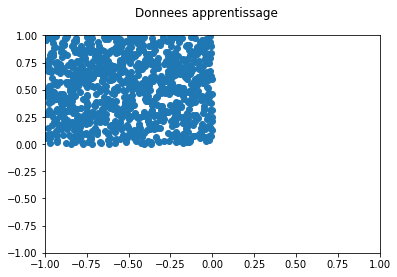

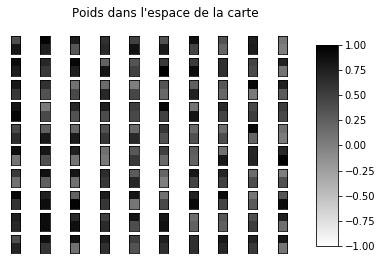

<Figure size 432x288 with 0 Axes>

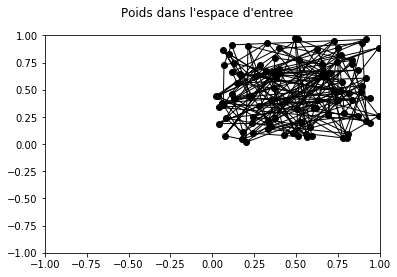

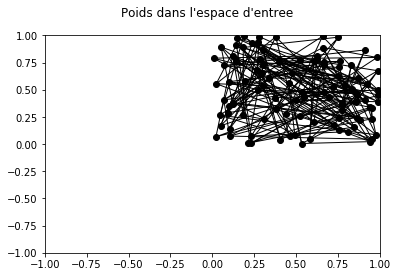

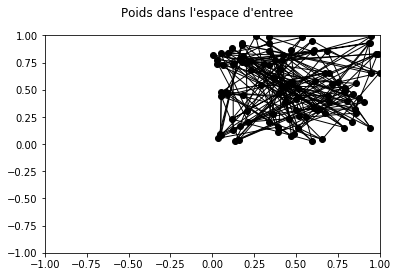

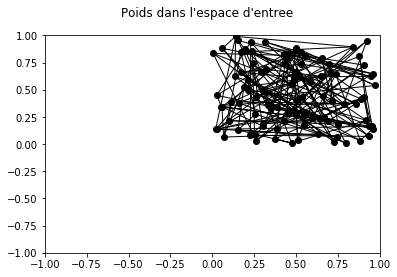

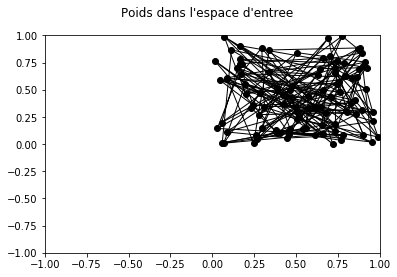

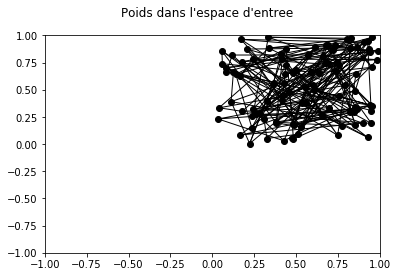

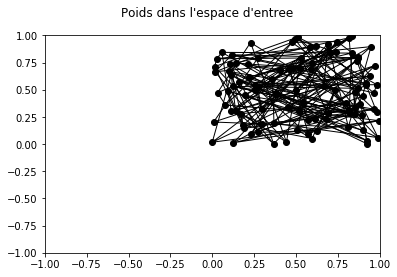

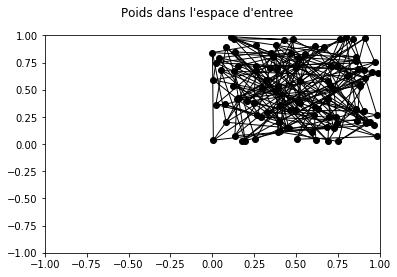

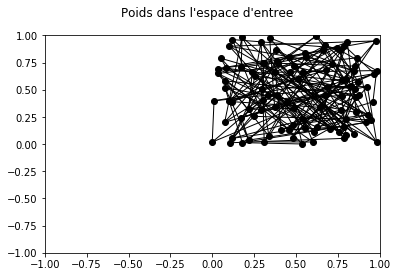

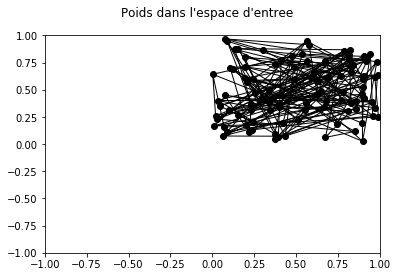

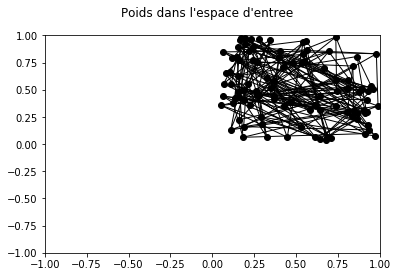

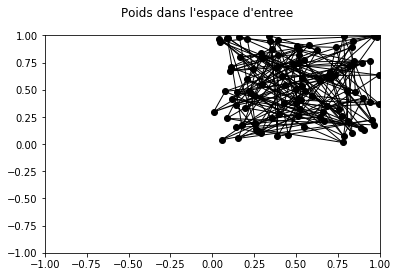

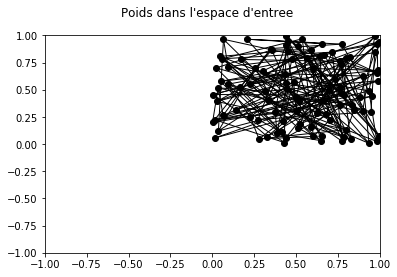

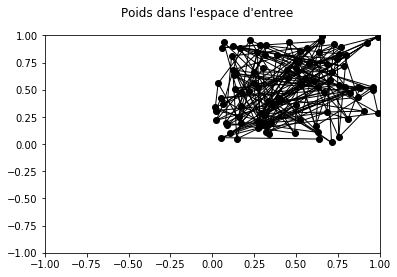

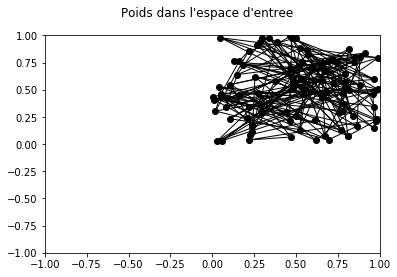

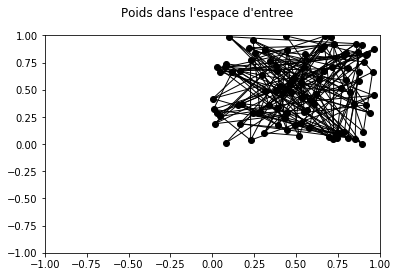

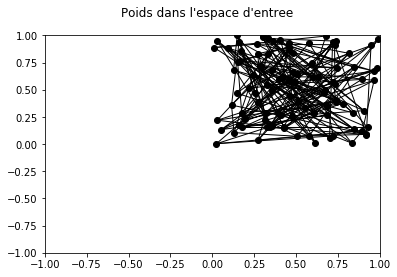

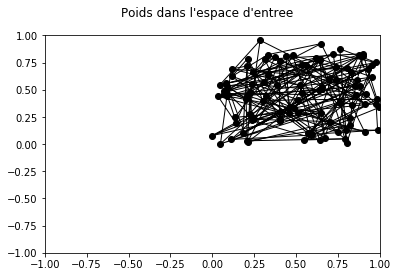

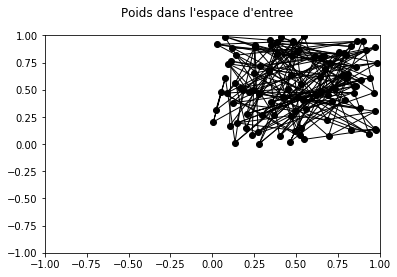

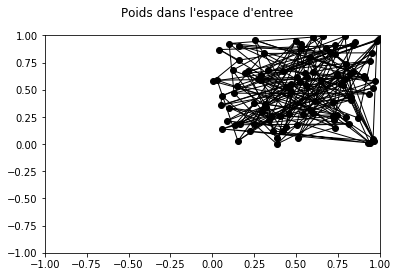

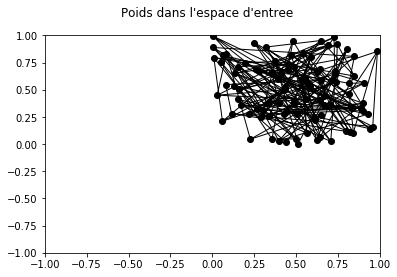

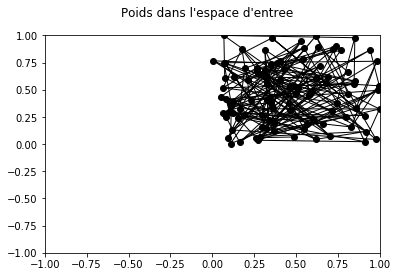

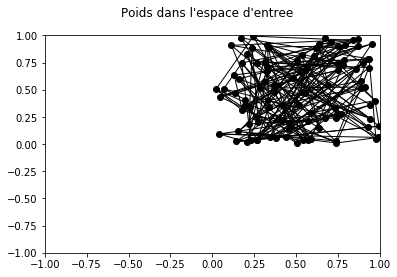

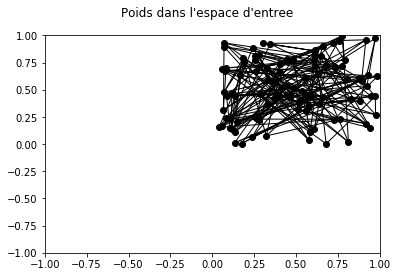

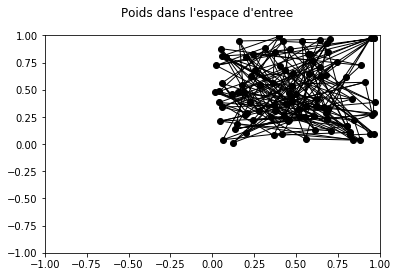

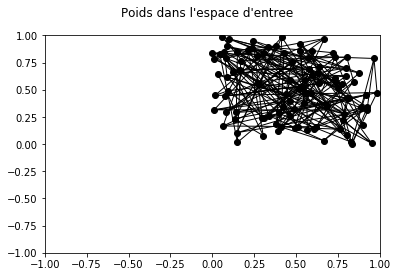

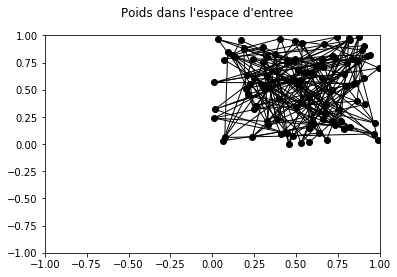

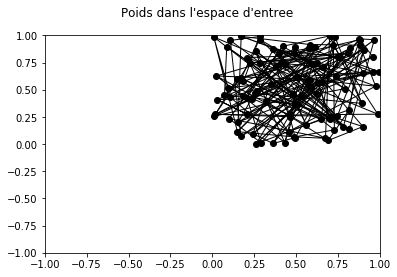

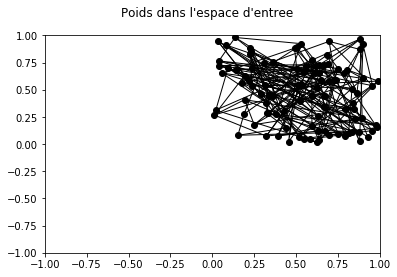

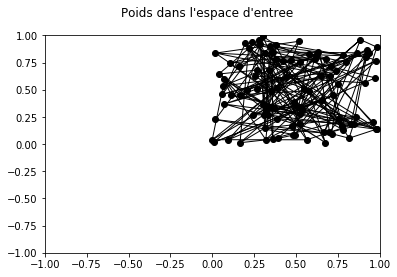

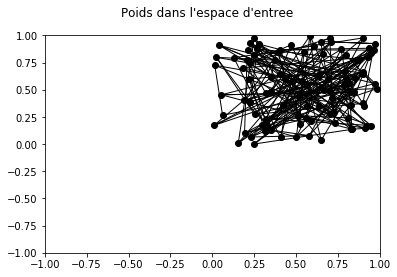

<Figure size 432x288 with 0 Axes>

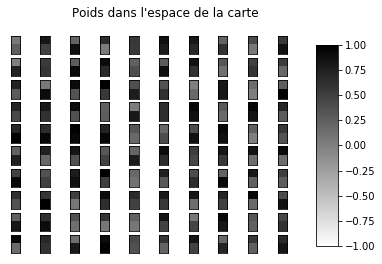

erreur de quantification vectorielle moyenne  nan


In [13]:


# -----------------------------------------------------------------------------
if __name__ == '__main__':
  # Création d'un réseau avec une entrée (2,1) et une carte (10,10) (TODO ATTENTION METTRE À JOUR LA TAILLE DE L'ENTRÉE POUR LES DONNÉES MNIST)
  network = SOM((2,1),(10,10))
  # PARAMÈTRES DU RÉSEAU
  # Taux d'apprentissage
  ETA = 0.05
  # Largeur du voisinage
  SIGMA = 1.4
  # Nombre de pas de temps d'apprentissage
  N = 30000
  # Affichage interactif de l'évolution du réseau (TODO ATTENTION METTRE À FAUX POUR LES DONNÉES MNIST)
  VERBOSE = True
  # Nombre de pas de temps avant rafraissichement de l'affichage
  NAFFICHAGE = 1000
  # DONNÉES D'APPRENTISSAGE
  # Nombre de données à générer pour les ensembles 1, 2 et 3
  nsamples = 1000
  # Ensemble de données 1
  samples = numpy.random.random((nsamples,2,1))
  samples[:,0,:] -= 1
  # Ensemble de données 2
#  nsamples = 999
#  samples1 = -numpy.random.random((nsamples//3,2,1))
#  samples2 = numpy.random.random((nsamples//3,2,1))
#  samples2[:,0,:] -= 1
#  samples3 = numpy.random.random((nsamples//3,2,1))
#  samples3[:,1,:] -= 1
#  samples = numpy.concatenate((samples1,samples2,samples3))
  # Ensemble de données 3
#  nsamples=1000
#  samples1 = numpy.random.random((nsamples//2,2,1))
#  samples1[:,0,:] -= 1
#  samples2 = numpy.random.random((nsamples//2,2,1))
#  samples2[:,1,:] -= 1
#  samples = numpy.concatenate((samples1,samples2))
  # Affichage des données (TODO ATTENTION À COMMENTER POUR LES DONNÉES MNIST)
  plt.figure()
  plt.scatter(samples[:,0,0], samples[:,1,0])
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.suptitle('Donnees apprentissage')
  plt.show()
  # Ensemble de données 4
#  nsamples = 70000
#  samples = cPickle.load(gzip.open('mnist.pkl.gz'))
    
  # SIMULATION
  # Affichage des poids du réseau
  network.plot()
  # Initialisation de l'affichage interactif
  if VERBOSE:
    # Création d'une figure
    plt.figure()
    # Mode interactif
    plt.ion()
    # Affichage de la figure
    plt.show()
  # Boucle d'apprentissage
  for i in range(N+1):
    # Choix d'un exemple aléatoire pour l'entrée courante
    index = numpy.random.randint(nsamples)
    x = samples[index].flatten()
    # Calcul de l'activité du réseau
    network.compute(x)
    # Modification des poids du réseau
    network.learn(ETA,SIGMA,x)
    # Mise à jour de l'affichage
    if VERBOSE and i%NAFFICHAGE==0:
      # Effacement du contenu de la figure
      plt.clf()
      # Remplissage de la figure
      network.scatter_plot(True)
      # Affichage du contenu de la figure
      plt.pause(0.00001)
      plt.draw()
  # Fin de l'affichage interactif
  if VERBOSE:
    # Désactivation du mode interactif
    plt.ioff()
  # Affichage des poids du réseau
  network.plot()
  # Affichage de l'erreur de quantification vectorielle moyenne après apprentissage
  print ("erreur de quantification vectorielle moyenne ",network.MSE(samples))

